In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

To check duplicate records

In [ ]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1359, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
data['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


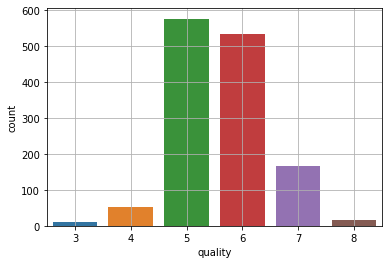

In [ ]:
sns.countplot(data['quality'])
plt.grid()

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


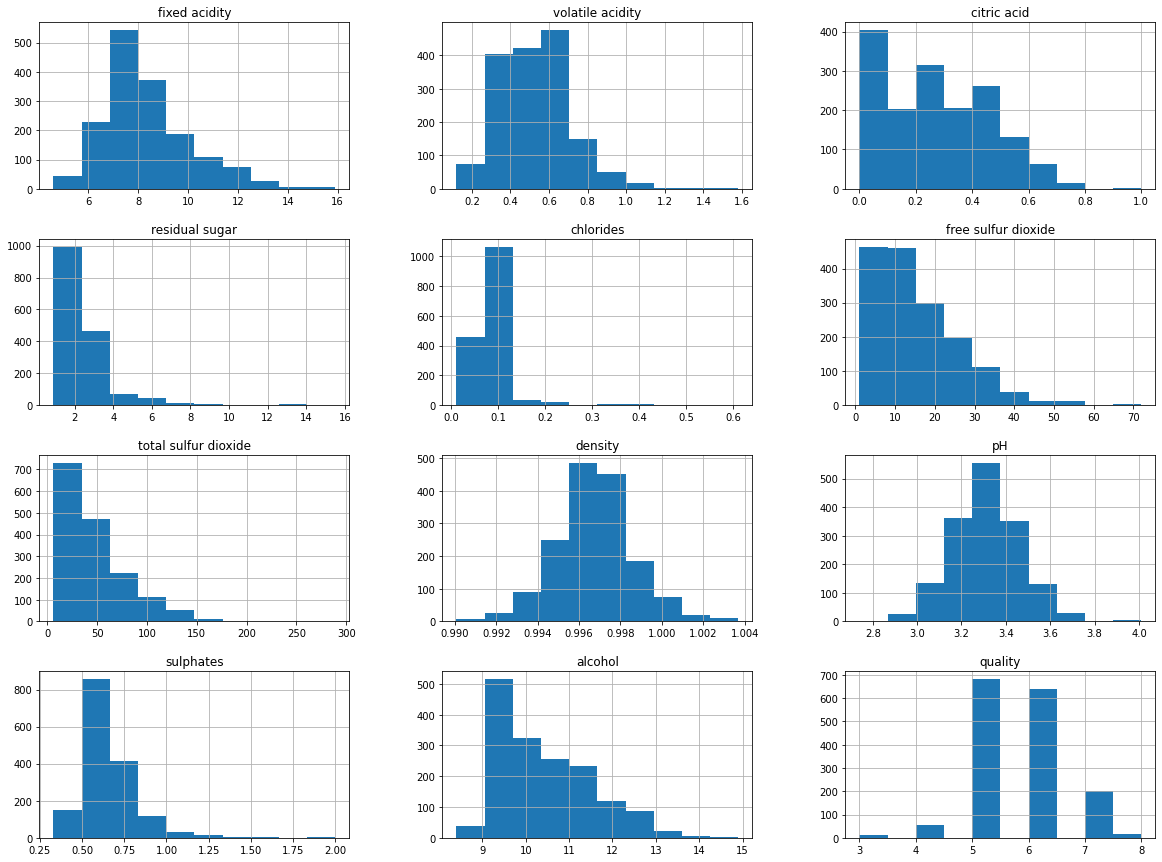

In [ ]:
#freq_graph = data.select_dtypes(include = ['int32', 'int64','float'])  #to check whether the variable data are normally distributed
#freq_graph.hist(figsize=(20,15))
#plt.show()

In [ ]:
y = data['quality']
x = data.drop(['quality'],axis=1)

In [ ]:
x.shape

(1359, 11)

## Data preprocessing

##Feature Reduction

###Through correlation analysis

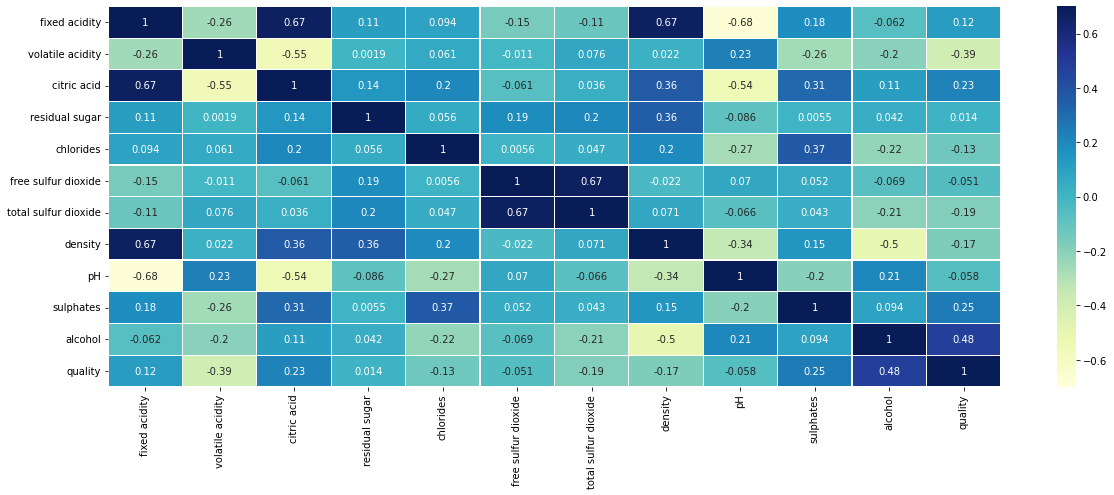

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize = (20,7))
sns.heatmap(corrmatrix, vmin = -0.7, vmax = 0.7, annot = True, linewidth = 0.2, cmap = 'YlGnBu')

When two variables have very high positive or negative correlaton, can remove one of them.
Here, fixed acidity have high correlation with density and citric acid.
Also, free sulfur dioxide and total sulfur dioxide are highy correlated.
so removing the columns of fixed acidity and free sulfur dioxide.

In [ ]:
#x1 = x.drop(['fixed acidity', 'free sulfur dioxide'],axis=1)

###Through VIF

VIF score of an ind.variable represents how well the variable is explained by other ind.variables.
VIF ranges from 1 to infinity.
VIF = 1, no correlation between the ind.variable and the other ind.variables.
VIF > 5 or 10 indicates high multicollinearity between the ind.variable and other ind.variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['vif'] = [ variance_inflation_factor(x_rescaled, i) for i in range(x_rescaled.shape[1]) ]
vif['features'] = x.columns
vif

,vif,features
0,7.880951,fixed acidity
1,1.777884,volatile acidity
2,3.124679,citric acid
3,1.641987,residual sugar
4,1.530769,chlorides
5,1.950922,free sulfur dioxide
6,2.216688,total sulfur dioxide
7,6.281009,density
8,3.397407,pH
9,1.466779,sulphates


'density' and 'fixed acidity' have vif scores >5. So, removing those features from ind.variables, x.

In [ ]:
x1 = x.drop(['fixed acidity','density'],axis=1)
x1.shape

(1359, 9)

##Feature Scaling
Used to bring all the feature values to the same magnitude. Otherwise python will interpret 1000 m greater than 7 km.

Some of the scaling techniques are,
1. Normalizer
2. Standardizer
3. Minmax Scaler
4. Binarizer

In [ ]:
from sklearn.preprocessing import StandardScaler  

x_rescaled = StandardScaler.fit_transform(x) returns an error becoz fit_transform() is not a class method, 
but an instance method. So, we have to convert tha class of StandardScaler to an instance StandardScaler().

In [ ]:
x_rescaled = StandardScaler().fit_transform(x1)

In [ ]:
x1.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
5,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4


In [ ]:
x_rescaled

array([[ 0.93200015, -1.39325797, -0.46115707, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [ 1.91580043, -1.39325797,  0.05666484, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [ 1.25993358, -1.18861732, -0.16525884, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [ 0.11216658, -0.88165635, -0.23923339, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [ 0.63139451, -0.77933603, -0.38718251, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.19956712,  1.01126962,  0.79641041, ...,  0.51757501,
         0.00759108,  0.52482366]])

## Building Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rescaled, y, random_state=42, test_size=0.25)

In [ ]:
from sklearn import linear_model

In [ ]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
print(y_test)

55      5
1291    6
1544    7
593     5
1261    4
       ..
106     5
1064    6
1439    6
1098    7
570     6
Name: quality, Length: 340, dtype: int64


In [ ]:
print(predictions)

[5.23144537 5.80056894 6.35189611 5.14056042 5.19892049 6.76900682
 5.69348894 4.82973137 5.82143118 5.66937232 6.32948796 5.91073672
 6.0011506  5.50863258 6.31976273 5.22431785 5.99364228 5.30250356
 5.19971977 5.82216751 5.24153202 6.16493613 5.28432981 4.76160516
 5.74848895 4.79615877 5.64991736 5.38043312 5.2238668  5.36300936
 6.05846128 6.33039673 5.76973714 4.69116658 5.61460497 6.26029756
 4.8439593  5.86000877 5.29018428 6.19397861 5.24963826 5.78682064
 6.03061591 4.61780265 5.44400845 5.44105138 5.06475982 4.33909532
 5.22011932 5.83158566 5.60889278 6.06637642 5.90146818 5.59727555
 6.31806076 5.13095132 5.26814043 5.22543168 5.01454785 6.06037914
 4.88586488 6.15600446 5.16339853 5.91250377 5.77077845 5.92154386
 5.0760514  5.41165848 6.17589734 6.11509629 5.51728504 5.97409104
 5.98104841 6.04223838 5.82391305 5.33751031 4.99549248 5.33120689
 5.41138193 5.4005061  5.96520137 5.43298778 5.09212599 5.58715093
 5.35469369 6.35573285 5.38335558 5.24497488 6.19639724 5.7406

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MSE is:', mean_squared_error(y_test, predictions))

MSE is: 0.40015281369165384


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print('R2 square value is:', r2_score(y_test,predictions))

R2 square value is: 0.4079473542799249


In [ ]:
input_data = (0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4)
input_data_array = np.asarray(input_data)
input_array_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_array_reshaped)
print(prediction)

[4.60601452]


In [ ]:
x_rescaled[0]

array([ 0.93200015, -1.39325797, -0.46115707, -0.2456228 , -0.46855352,
       -0.38404973,  1.29187216, -0.57856134, -0.95437429])

In [ ]:
input_data = (0.93200015, -1.39325797, -0.46115707, -0.2456228 , -0.46855352, -0.38404973,  1.29187216, -0.57856134, -0.95437429)
input_data_array = np.asarray(input_data)
input_array_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_array_reshaped)
print(prediction)

[5.01518446]


## Other method of Correlation Analysis.

In [ ]:
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

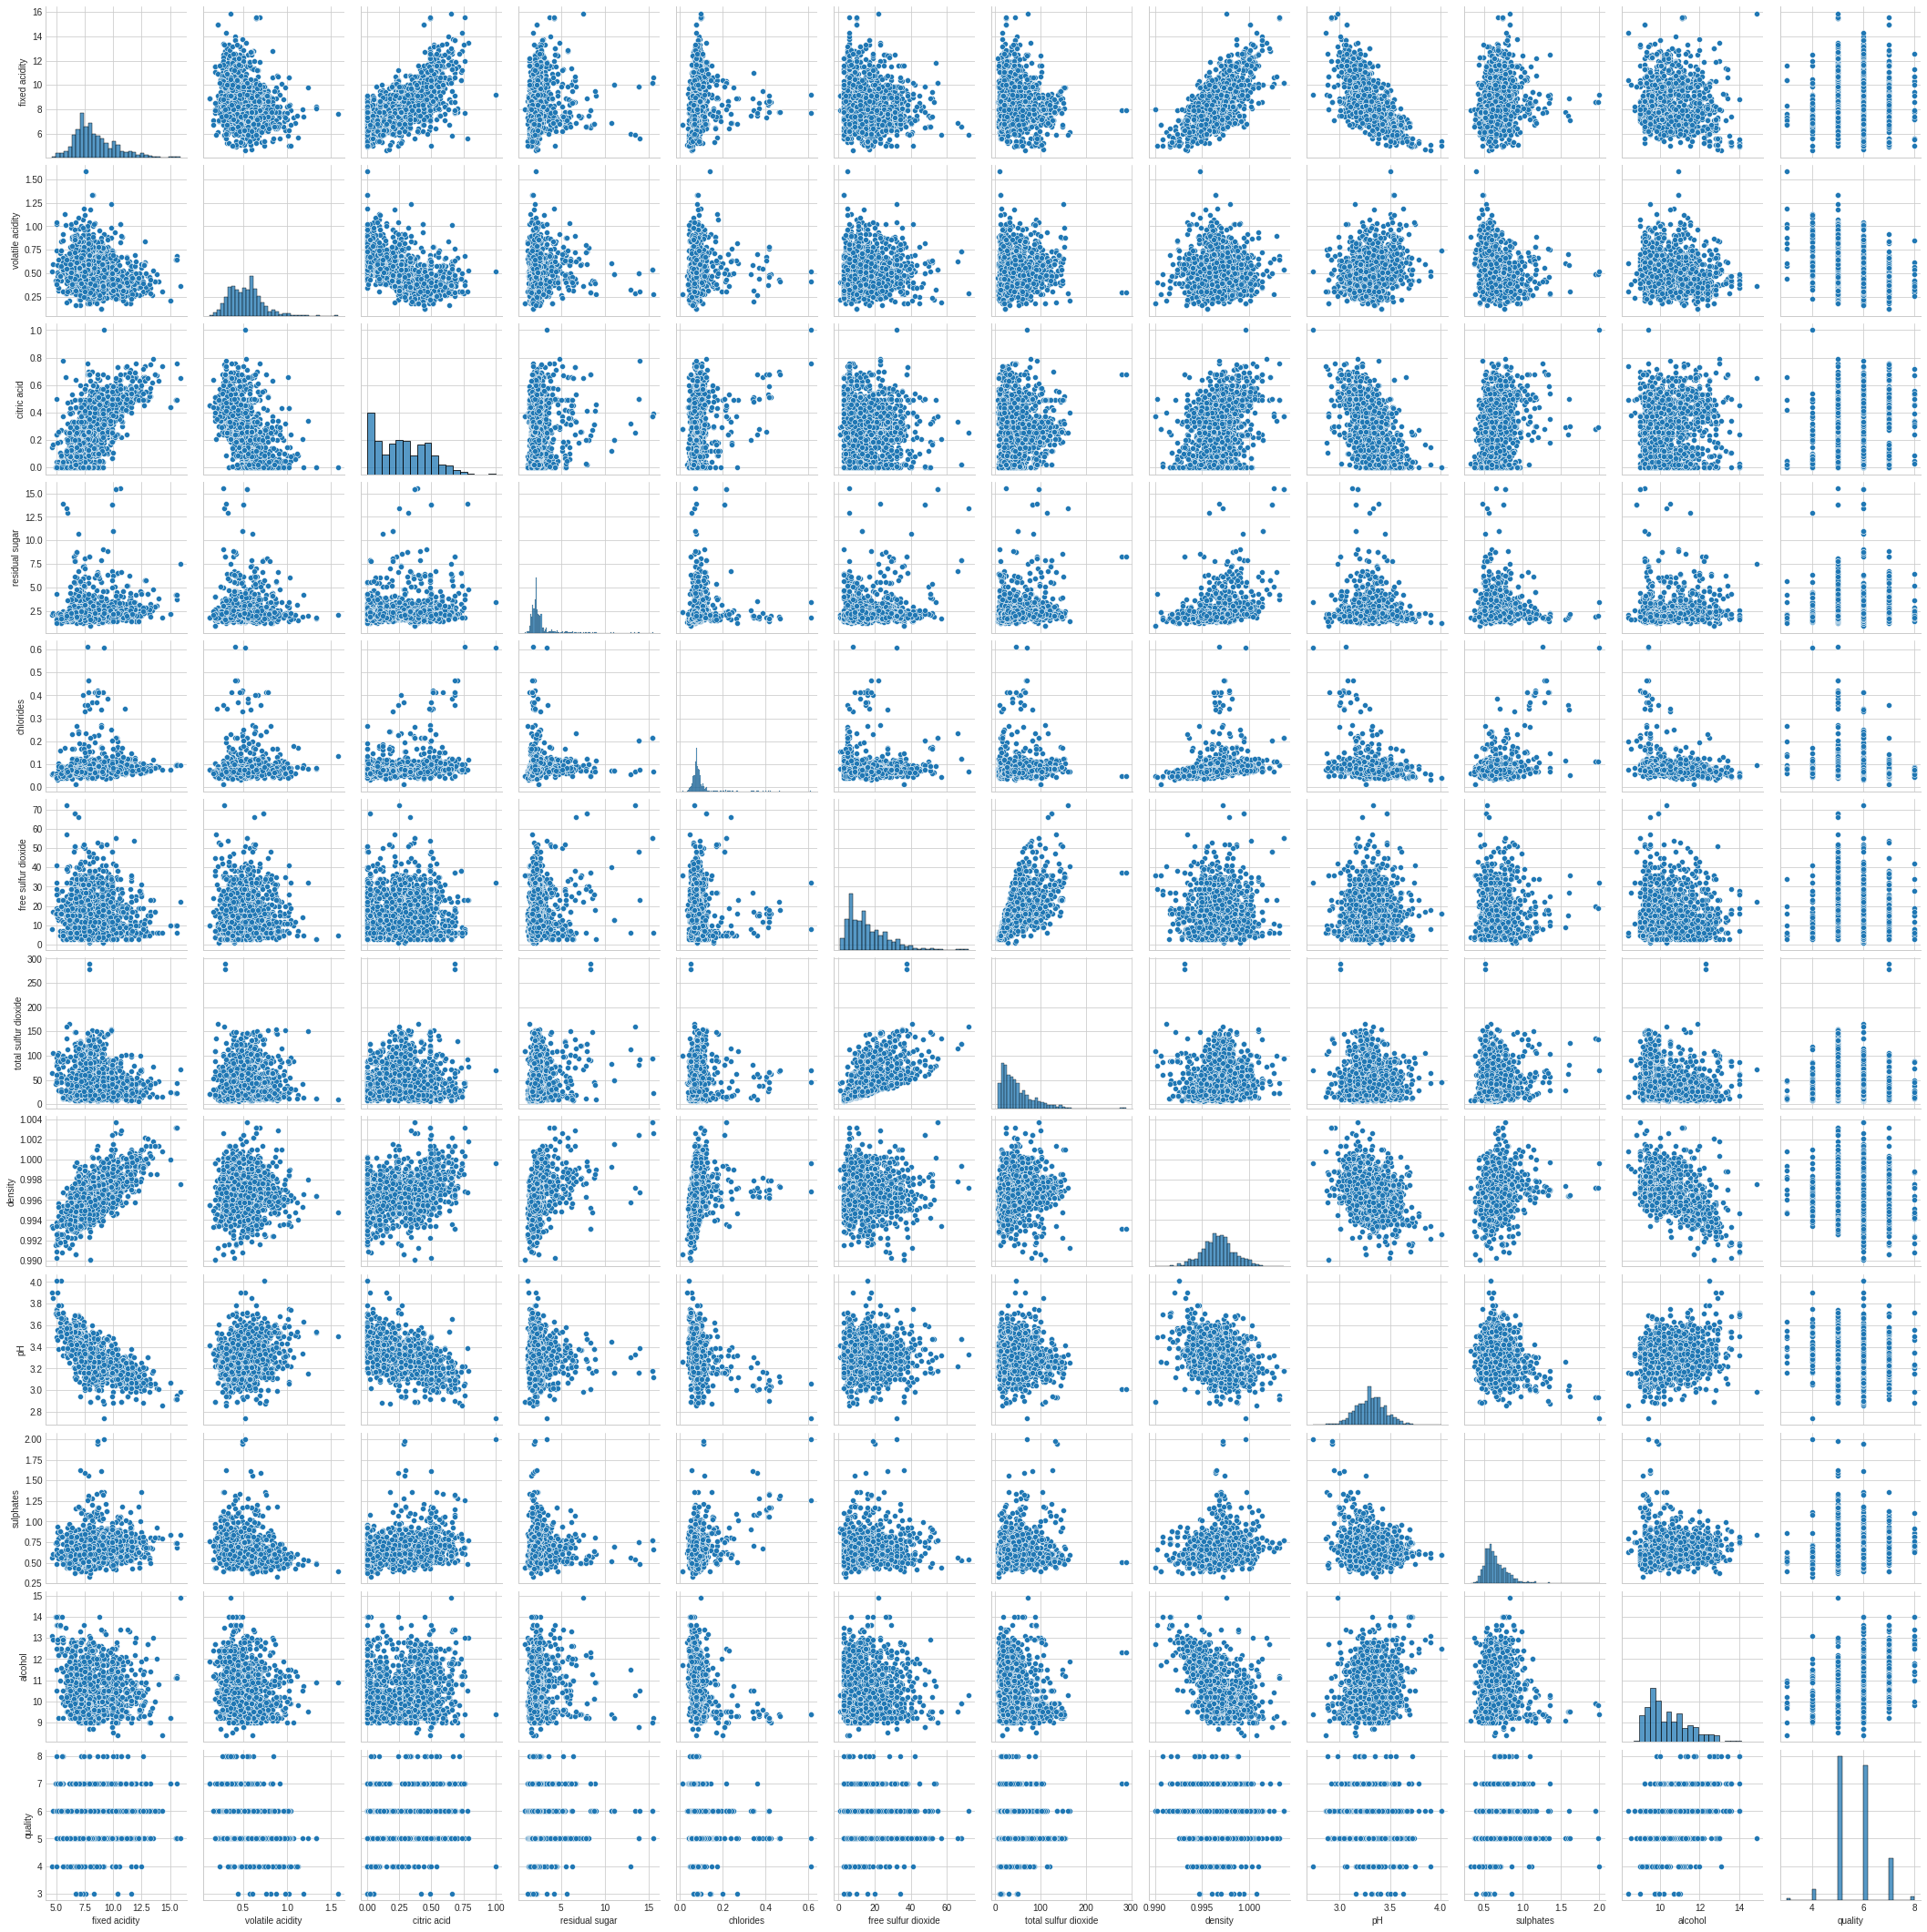

In [ ]:
#sns.pairplot(data)

In [ ]:
pearsonr_coeff, p_value = pearsonr(data['fixed acidity'], data['density'])
print('pearsonr_coefficient = %.4f, p_value = %.40f' % (pearsonr_coeff,p_value))

pearsonr_coefficient = 0.6680, p_value = 0.0000000000000000000000000000000000000000


In [ ]:
pearsonr_coeff, p_value = pearsonr(data['fixed acidity'], data['pH'])
print('pearsonr_coefficient = %.4f, p_value = %.40f' % (pearsonr_coeff,p_value))

pearsonr_coefficient = -0.6830, p_value = 0.0000000000000000000000000000000000000000


In [ ]:
pearsonr_coeff, p_value = pearsonr(data['volatile acidity'], data['pH'])
print('pearsonr_coefficient = %.4f, p_value = %.40f' % (pearsonr_coeff,p_value))

pearsonr_coefficient = 0.2349, p_value = 0.0000000000000000000017189939570072257301


In [ ]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Other Methods of Linear Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 

In [ ]:
x = data.loc[:,:'alcohol']
y = data['quality']

Transform Data or scale the variables before modeling.

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

LASSO: Least Absolute Shrinkage and Selection Operator

In [ ]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

SVR: Support Vector Regression

In [ ]:
svr = SVR(C=8, epsilon=0.2, gamma=0.5)
svr.fit(x_train, y_train)

SVR(C=8, epsilon=0.2, gamma=0.5)

Lasso predictions

In [ ]:
y_pred_lasso = np.round(np.clip(lasso.predict(x_test),1,10)).astype(int)
np.round(1-mean_squared_error(y_test, y_pred_lasso)/y_test.std(),2)

0.38

SVR predictions

In [ ]:
y_pred_svr = np.round(np.clip(svr.predict(x_test), 1, 10)).astype(int)
np.round(1-mean_squared_error(y_test,y_pred_svr)/y_test.std(), 2)

0.24

SVR outperforms Lasso here

## Another Way

In [ ]:
from scipy import stats
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Calculate r_square
slope, intercept, r_value, p_value, std_error = stats.linregress(data['alcohol'],data['quality'])

In [ ]:
#Print r_square
print('r_square:', r_value**2)

r_square: 0.2267343681127547


In [ ]:
#Model OLS to generate coefficients
model = smf.ols(formula='quality ~ alcohol', data = data).fit()

In [ ]:
#Output the coefficient
model.params

Intercept    1.874975
alcohol      0.360842
dtype: float64

for one unit change(increase) in alcohol, quality changes(increases) by 0.36 units